# **Vehicle Counting System using OpenCV**
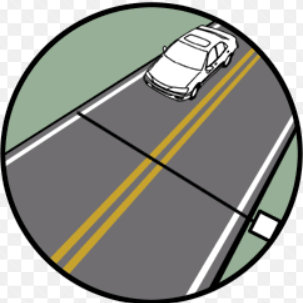

**By:** Praveen Choudhary

**Project Description:**
---------------------
This project implements a real-time vehicle counting system using OpenCV, a powerful computer vision library. The system is designed to analyze video footage and detect vehicles, keeping track of their count as they cross a predefined line. The application is capable of handling various environmental conditions and provides visual feedback on the video stream, displaying the count in real-time.

**Objective:**
-----------
The main objective of this project is to develop an efficient vehicle counting system for traffic monitoring and management. The system employs background subtraction, image processing techniques, and contour detection to identify vehicles in a video stream. By establishing a counting line, the system tracks vehicles crossing the line, updating the count dynamically.

**Key Features:**
--------------
1. Real-time vehicle counting in a video stream.
2. Implementation of background subtraction using OpenCV.
3. Integration of image processing techniques for enhanced vehicle detection.
4. Contour detection for identifying and tracking vehicles.
5. Dynamic display of the vehicle count on the video feed.

In [1]:
# Import Some Library
import cv2 as cv
import numpy as np

In [5]:
# web capture
capture = cv.VideoCapture('video.mp4')

count_line_postion = 550

min_width_rectangle =  15
min_length_rectangle = 15

# counting list
def center_handle(x,y,w,h):
    x1 = int(w/2)
    y1=  int(h/2)
    cx=x+x1
    cy=y+y1
    return cx,cy

detect = [] 
offset = 6 # error between pixcel
counter = 0

# Subtract Background
bg_sub = cv.createBackgroundSubtractorMOG2(history=500, varThreshold=350, detectShadows=False)
while True:

    ret,frame = capture.read()
    # convert into grey
    grey = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

    #Median Filter Kernel: A 3x3 kernel for median filtering.
    n=20
    kernel = np.array([[2/n,4/n,2/n],
                       [4/n,8/n,4/n],
                       [2/n,4/n,2/n]])

    blur = cv.filter2D(grey,0,kernel)
    
    # Dilation Kernel: A 3x3 kernel for image dilation with 12 iterations
    img_sub = bg_sub.apply(blur)
    kernel = np.array([[1,1,1],
                       [1,1,1],
                       [1,1,1]],dtype=np.uint8)

    
    dilat = cv.dilate(img_sub,kernel,iterations = 12)  #12        
    
    # Erosion Kernel: A 3x3 kernel for image erosion with 28 iterations.
    kernel = np.array([[1,1,1],
                       [1,1,1],
                       [1,1,1]],dtype=np.uint8)
 
    diltada = cv.erode(dilat,kernel,iterations = 28) #28

    #shape Counter
    counterShape,h = cv.findContours(diltada,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    
    cv.line(frame,(50,count_line_postion),(1500,count_line_postion),(255,0,255),2)
    
    for (i,c) in enumerate(counterShape):
        (x,y,w,h) = cv.boundingRect(c)
        validate_counter = (w>= min_width_rectangle) and (w>= min_length_rectangle)   
        if not validate_counter:
            continue
        
        cv.rectangle(frame,(x-5,y-5),(x+w-5,y+w-5),(0,255,0),2)

        
        center = center_handle(x,y,w,h)
        detect.append(center)

        cv.circle(frame, center, 5, (0, 0, 255), -1)
        
        for (x,y) in detect:
            if y<(count_line_postion + offset ) and y>(count_line_postion - offset ):
                counter += 1
                cv.line(frame,(50,count_line_postion),(1500,count_line_postion),(0,115,205),2)
                detect.remove((x,y))
    
    # Text On Screen
    cv.rectangle(frame, (400, 10), (1100, 100), (0, 0, 0), -1)
    cv.putText(frame, "Vehicle Counter: " + str(counter), (450, 75), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)
    cv.putText(frame, "Vehicle Counter: " + str(counter), (450, 75), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 215, 255), 2)
     
    cv.imshow('Video Original',frame)    
    if cv.waitKey(1) == 13:
        break

cv.destroyAllWindows()

capture.release

<function VideoCapture.release>